<a href="https://colab.research.google.com/github/Manju-5/Assignment/blob/main/Clustering_model%20Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data=pd.read_csv('Wine_clust.csv')  # 1. Reading the dataset to python environment
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Preprocessing


In [ ]:
data.info() # checking details of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [ ]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

1. K means clustering

In [ ]:
from sklearn.cluster import KMeans


In [ ]:
wcss=[]  # empty list
for i in range (1,14): # iterating from 1 to 13
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)  # k-means++ is used to avoid RIT
  kmeans.fit(data)
  wcss.append(kmeans.inertia_) # inertia_ is used to calculate wcss value and append it to wcss list

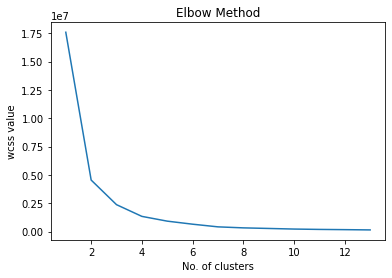

In [ ]:
plt.plot(range(1,14),wcss)
plt.title('Elbow Method')
plt.xlabel('No. of clusters')
plt.ylabel('wcss value')
plt.show()

In [ ]:
# we get optimal no. of clusters as 4
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)  # Creating kmeans clustering model
y_kmeans=kmeans.fit_predict(data)
y_kmeans

array([4, 4, 4, 1, 0, 1, 1, 1, 4, 4, 1, 1, 1, 4, 1, 1, 1, 4, 1, 0, 0, 0,
       4, 4, 0, 0, 4, 1, 0, 4, 1, 1, 4, 1, 4, 0, 0, 4, 4, 0, 0, 4, 4, 3,
       0, 4, 4, 4, 4, 1, 4, 1, 4, 1, 4, 4, 4, 1, 1, 2, 3, 2, 3, 2, 2, 3,
       2, 2, 0, 3, 0, 2, 2, 4, 0, 2, 2, 2, 0, 2, 2, 3, 3, 2, 2, 2, 2, 3,
       3, 3, 2, 2, 2, 2, 2, 0, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 3,
       3, 2, 3, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2,
       3, 3, 3, 3, 3, 2, 3, 3, 3, 0, 2, 3, 0, 0, 2, 3, 3, 3, 2, 2, 2, 3,
       3, 3, 2, 0, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 0, 3, 2, 2, 3, 0, 0, 0,
       0, 3], dtype=int32)

Thus there are 5 clusters.1st three data belong to cluster4. 4th data belong to cluster 1 and so on.

2. Hierarchical Clustering- Agglomerative

In [4]:
import scipy.cluster.hierarchy as sch

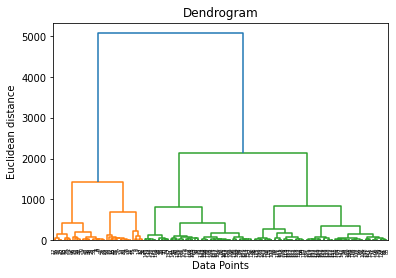

In [9]:
dendrogram=sch.dendrogram(sch.linkage(data, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean distance')
plt.show()

Optimum no. of clusters is 2

* Agglomerative hierarchical model

In [10]:
from sklearn.cluster import AgglomerativeClustering

In [11]:
hc=AgglomerativeClustering(n_clusters=2, affinity='euclidean',linkage='ward')

In [12]:
y_hc=hc.fit_predict(data)
y_hc

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

There are 2 clusters. 1st four data belomg to cluster 1, next to cluster 0 and so on.

3. DB scan clustering
The DBSCAN algorithm is based on the intuitive notion of “clusters” and “noise”. The key idea is that for each point of a cluster, the neighborhood of a given radius has to contain at least a minimum number of points. 

In [17]:
from sklearn.cluster import DBSCAN


In [18]:
# Reading in 2D Feature Space
feature_space = pd.read_csv("Wine_clust.csv")
data = feature_space.iloc[:, 0:2].values


In [19]:
# DBSCAN model with parameters
model = DBSCAN(eps=0.8, min_samples=10).fit(data)